# Importing Libararies

In [25]:
import json
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Downlaod & Explore Data

* https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2021-09-16 18:12:29--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.128, 74.125.20.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.1s    

2021-09-16 18:12:30 (38.2 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [3]:
json_file = '/tmp/sarcasm.json'

with open(json_file) as f:
  datastore = json.load(f)

In [4]:
len(datastore)

26709

In [5]:
datastore[:5]

[{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
  'headline': "former versace store clerk sues over secret 'black code' for minority shoppers",
  'is_sarcastic': 0},
 {'article_link': 'https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365',
  'headline': "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
  'is_sarcastic': 0},
 {'article_link': 'https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697',
  'headline': "mom starting to fear son's web series closest thing she will have to grandchild",
  'is_sarcastic': 1},
 {'article_link': 'https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302',
  'headline': 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
  'is_sarcastic': 1},
 {'article_link': 'https://www.huffingtonpost.com/entry/jk-rowling-w

In [6]:
sentences = []
labels = []
urls = []

for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])
  urls.append(item['article_link'])

In [7]:
print(sentences[0])
print(labels[0])
print(urls[0])

former versace store clerk sues over secret 'black code' for minority shoppers
0
https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5


In [8]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [9]:
train_sentences = sentences[0:training_size]
test_sentences  = sentences[training_size:]
train_labels    = labels[0:training_size]
test_labels     = labels[training_size:]

# Create Tokenizer & Sequences

In [10]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(sentences)

In [11]:
word_index = tokenizer.word_index
print(len(word_index))

29657


In [12]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded_seq = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded_seq = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [19]:
train_padded_seq = np.array(train_padded_seq)
train_labels = np.array(train_labels)
test_padded_seq = np.array(test_padded_seq)
test_labels = np.array(test_labels)

# Create & Train Model

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [21]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [22]:
num_epochs = 30

history = model.fit(train_padded_seq, 
                    train_labels, 
                    epochs=num_epochs, 
                    validation_data=(test_padded_seq, test_labels))

Epoch 1/30
625/625 [==============================] - 3s 4ms/step - loss: 0.6655 - accuracy: 0.5918 - val_loss: 0.5844 - val_accuracy: 0.7754
Epoch 2/30
625/625 [==============================] - 2s 3ms/step - loss: 0.4397 - accuracy: 0.8296 - val_loss: 0.3892 - val_accuracy: 0.8377
Epoch 3/30
625/625 [==============================] - 2s 4ms/step - loss: 0.3187 - accuracy: 0.8729 - val_loss: 0.3584 - val_accuracy: 0.8438
Epoch 4/30
625/625 [==============================] - 2s 3ms/step - loss: 0.2674 - accuracy: 0.8967 - val_loss: 0.3387 - val_accuracy: 0.8596
Epoch 5/30
625/625 [==============================] - 2s 4ms/step - loss: 0.2323 - accuracy: 0.9099 - val_loss: 0.3379 - val_accuracy: 0.8588
Epoch 6/30
625/625 [==============================] - 2s 3ms/step - loss: 0.2059 - accuracy: 0.9211 - val_loss: 0.3459 - val_accuracy: 0.8529
Epoch 7/30
625/625 [==============================] - 2s 3ms/step - loss: 0.1836 - accuracy: 0.9330 - val_loss: 0.3676 - val_accuracy: 0.8472
Epoch 

In [24]:
model.evaluate(test_padded_seq, test_labels)

210/210 [==============================] - 0s 1ms/step - loss: 0.9599 - accuracy: 0.8196


[0.9598597884178162, 0.8196452260017395]

# Visualize Loss & Accuracy Graph

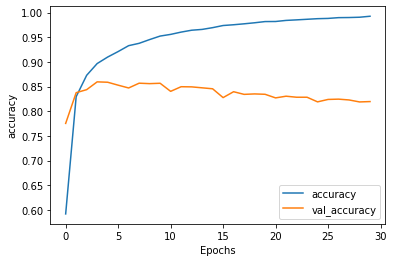

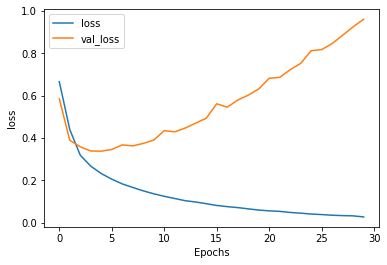

In [26]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

# To Visualize Embedding

In [27]:
reverse_word_index = dict([(v, k) for (k, v) in word_index.items()])
len(word_index), len(reverse_word_index)

(29657, 29657)

In [28]:
def decode_review(text):
  sentence = ' '.join([reverse_word_index.get(i, '?') for i in text])
  return sentence

In [29]:
train_sentences[2]

"mom starting to fear son's web series closest thing she will have to grandchild"

In [31]:
decode_review(train_padded_seq[2])

"mom starting to fear son's web series closest thing she will have to <OOV> ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?"

In [32]:
e = model.layers[0]
e

In [33]:
e.get_weights()[0]

array([[ 0.02511233, -0.08572429,  0.07241043, ..., -0.04682586,
         0.0418556 , -0.01065964],
       [ 0.01094262,  0.00650799,  0.0618397 , ..., -0.1006019 ,
         0.07055772, -0.06097399],
       [-0.10849065,  0.00467881,  0.10948724, ..., -0.14185108,
         0.20174937, -0.12324592],
       ...,
       [-0.09695187,  0.10040289,  0.15084878, ..., -0.11852337,
         0.11645625, -0.1460955 ],
       [ 0.08905916, -0.16266324, -0.11938777, ...,  0.1153968 ,
        -0.12381243,  0.08112681],
       [ 0.04330207, -0.09077145, -0.00135319, ...,  0.01431839,
         0.02841332,  0.00584135]], dtype=float32)

In [35]:
weights = e.get_weights()[0]
weights.shape

(10000, 16)

In [36]:
# Get vectors and metadata

import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
# To download these files
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

# Test the Model

In [34]:
sentence = ["granny starting to fear spiders in the garden might be real", 
            "game of thrones season finale showing this sunday night"]

sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(model.predict(padded))

[[9.345772e-01]
 [9.059906e-04]]
